# 数据加载与概况分析

In [40]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# 1. 加载数据
file_path = '../data/raw/pos.csv'
data = pd.read_csv(file_path, index_col=0)

# 2. 数据概况
print("数据前几行：")
display(data.head())  # 显示前几行

数据前几行：


,bacterium,modifications,sequence,strain,unit,url_source,value,is_modified,has_unusual_modification,has_cterminal_amidation,datasource_has_modifications,database
0,B. subtilis,[disulfide],GLPRKILCAIAKKKGKCKGPLKLVCKC,NaN,uM,http://aps.unmc.edu/AP/database/query_output.p...,-0.397940,True,False,False,True,APD
1,S. agalactiae,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,NaN,uM,http://aps.unmc.edu/AP/database/query_output.p...,-1.859819,True,False,False,True,APD
2,S. aureus,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC29213,uM,http://aps.unmc.edu/AP/database/query_output.p...,0.566150,True,False,False,True,APD
3,S. pneumonia,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC49619,uM,http://aps.unmc.edu/AP/database/query_output.p...,-1.240030,True,False,False,True,APD
4,S. epidermidis,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC12228,uM,http://aps.unmc.edu/AP/database/query_output.p...,0.566150,True,False,False,True,APD


In [43]:
# 添加序列长度信息
data['length'] = data['sequence'].apply(len)

In [44]:
print("数据基本信息：")
data_info = data.info()  # 显示数据类型、非空值等信息

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
Index: 51345 entries, 0 to 62493
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bacterium                     51345 non-null  object 
 1   modifications                 51345 non-null  object 
 2   sequence                      51345 non-null  object 
 3   strain                        29111 non-null  object 
 4   unit                          51345 non-null  object 
 5   url_source                    51345 non-null  object 
 6   value                         51345 non-null  float64
 7   is_modified                   51345 non-null  bool   
 8   has_unusual_modification      51345 non-null  bool   
 9   has_cterminal_amidation       51345 non-null  bool   
 10  datasource_has_modifications  51345 non-null  bool   
 11  database                      51345 non-null  object 
 12  length                        51345 non-null  int64  
dty

In [45]:
# 3. 缺失值分析
print("缺失值分析：")
missing_data = data.isnull().sum()  # 统计每列的缺失值数量
print(missing_data)

缺失值分析：
bacterium                           0
modifications                       0
sequence                            0
strain                          22234
unit                                0
url_source                          0
value                               0
is_modified                         0
has_unusual_modification            0
has_cterminal_amidation             0
datasource_has_modifications        0
database                            0
length                              0
dtype: int64


In [46]:
# 4. 描述性统计
print("数据的统计描述：")
data_description = data.describe()  # 获取数值型数据的统计描述
display(data_description)

数据的统计描述：


,value,length
count,51345.000000,51345.000000
mean,1.023112,21.898062
std,0.822811,13.590164
min,-4.684175,1.000000
25%,0.477898,13.000000
50%,1.008459,19.000000
75%,1.602060,26.000000
max,4.570309,190.000000


In [47]:
# 5. 类别变量的计数（例如 'bacterium' 和 'modifications'）
print("类别变量的计数：")
bacterium_counts = data['bacterium'].value_counts()  # 统计 'bacterium' 列的类别计数
print(bacterium_counts)

modifications_counts = data['modifications'].value_counts()  # 统计 'modifications' 列的类别计数
print(modifications_counts)

类别变量的计数：
bacterium
E. coli               9150
S. aureus             8954
P. aeruginosa         4966
C. albicans           2860
B. subtilis           2398
                      ... 
V. coralliilyticus       1
V. shiloi                1
M. hominis               1
P. ssp                   1
C. michiaganesis         1
Name: count, Length: 766, dtype: int64
modifications
[]                                                                             29101
[C-Terminus: AMD]                                                              13623
[C-Terminus: AMD, Unusual Acid]                                                 1484
[Unusual Acid]                                                                  1217
[disulfide]                                                                     1126
                                                                               ...  
[Unknown modification: Contains one disulfide bond 23-28.]                         1
[Unknown modification: N-terminus is

# 数据可视化

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc("font", family="Arial")

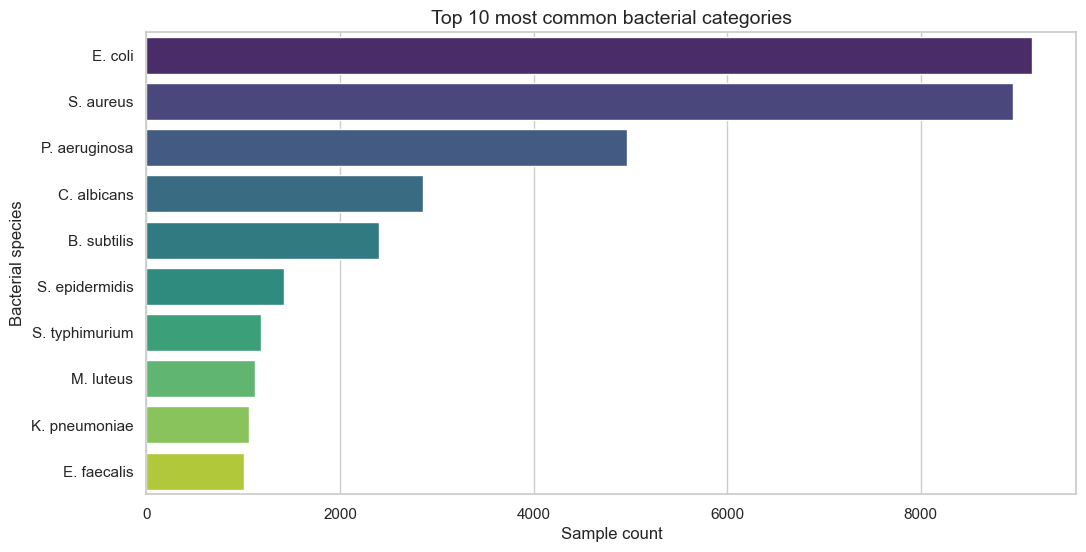

In [50]:
# 细菌类别分布（仅展示前10个最多的细菌）
top_10_bacteria = data['bacterium'].value_counts().nlargest(10)  # 获取出现最多的前10个细菌类别

plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_bacteria.index, x=top_10_bacteria.values, hue=top_10_bacteria.index, palette="viridis", legend=False)
plt.title("Top 10 most common bacterial categories", fontsize=14)
plt.xlabel("Sample count")
plt.ylabel("Bacterial species")
plt.show()

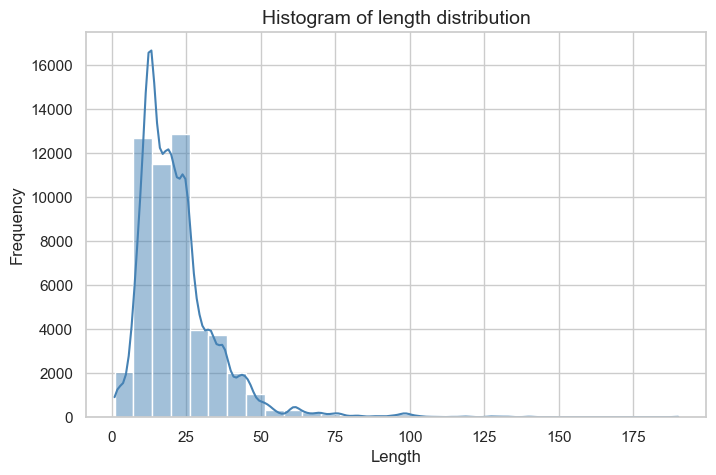

In [51]:
# 序列长度分布
plt.figure(figsize=(8, 5))
sns.histplot(data['length'], bins=30, kde=True, color='steelblue')
plt.title("Histogram of length distribution", fontsize=14)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

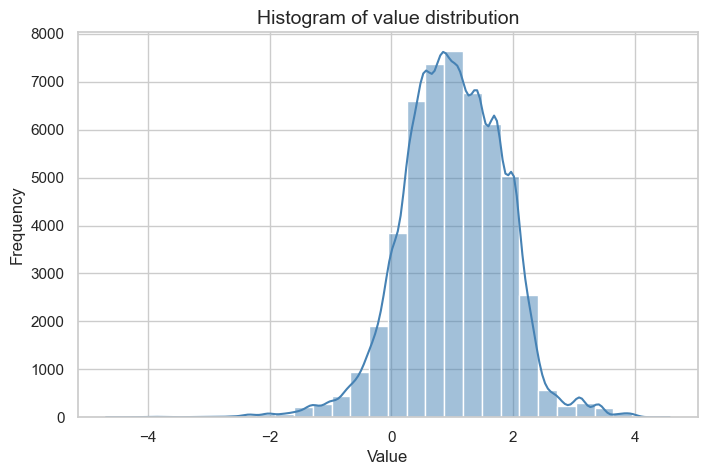

In [52]:
# MIC value分布（如 value）
plt.figure(figsize=(8, 5))
sns.histplot(data['value'], bins=30, kde=True, color='steelblue')
plt.title("Histogram of value distribution", fontsize=14)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

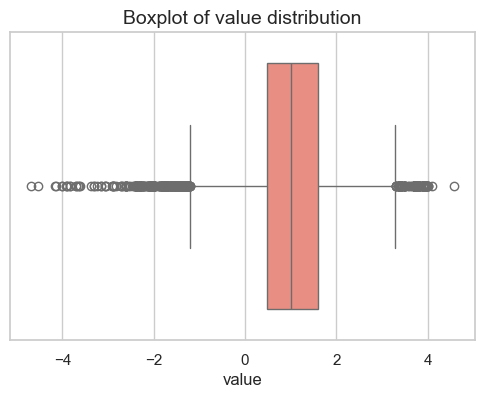

In [53]:
# 3. Boxplot 查看数值列是否存在异常值
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['value'], color="salmon")
plt.title("Boxplot of value distribution", fontsize=14)
plt.xlabel("value")
plt.show()